In [55]:
import pandas as pd

# Load the datasets
df_true = pd.read_csv('True.Dataset.csv', low_memory=False)
df_fake = pd.read_csv('Fake.Dataset.csv', low_memory=False) 

# Assign labels: 1 for Real news, 0 for Fake news
df_true['label'] = 1
df_fake['label'] = 0

# Merge both dataframes
df = pd.concat([df_true, df_fake]).reset_index(drop=True)

# Keep only the important columns (Title, Text, and Label)
# This is to avoid problems with those 171 messy columns
df = df[['title', 'text', 'label']]

# Shuffle the data to mix real and fake news
df = df.sample(frac=1).reset_index(drop=True)

print("Dataset Merged Successfully!")
df.head()

Dataset Merged Successfully!


,title,text,label
0,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,1
1,Trump Hotels pulls out of Rio hotel named in c...,BRASILIA (Reuters) - The Trump Organization In...,1
2,TYRA FOR TRUMP Hammers The Media On Their Bias...,Tyra for Trump lets it rip on the biased media...,0
3,Exclusive: Republican U.S. tax framework sets ...,WASHINGTON (Reuters) - Republicans in the U.S....,1
4,SHOCKING SUMMARY Of The DNC Convention So Far…...,What a crazy group of professional agitators a...,0


In [59]:
# Check the total number of rows and columns in the dataset
print("Total rows and columns:", df.shape)

# Check the distribution of Real (1) and Fake (0) news
print("Counts for each label:")
print(df['label'].value_counts())

Total rows and columns: (44919, 3)
Counts for each label:
label
0    23502
1    21417
Name: count, dtype: int64


In [61]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs, HTML tags, and non-alphabetic characters
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenization and removing stopwords
    words = text.split()
    
    # 4. Lemmatization (converting words to base form)
    cleaned_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    
    return " ".join(cleaned_words)

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display original vs cleaned text
df[['text', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to C:\Users\Siti Hanisa
[nltk_data]     Hanani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Siti Hanisa
[nltk_data]     Hanani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,cleaned_text
0,(Reuters) - U.S. Republican presidential front...,reuters u republican presidential frontrunner ...
1,BRASILIA (Reuters) - The Trump Organization In...,brasilia reuters trump organization inc said w...
2,Tyra for Trump lets it rip on the biased media...,tyra trump let rip biased medium tell everyone...
3,WASHINGTON (Reuters) - Republicans in the U.S....,washington reuters republican u congress white...
4,What a crazy group of professional agitators a...,crazy group professional agitator political sc...


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We convert text into numbers using TF-IDF
# We limit to 5000 words to keep the model efficient
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# X is our features (the text), y is our target (1 or 0)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

print("Success: Text has been converted to numerical vectors!")

Success: Text has been converted to numerical vectors!


In [65]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape[0]} rows")
print(f"Testing data: {X_test.shape[0]} rows")

Training data: 35935 rows
Testing data: 8984 rows


In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Initialize the model
model = PassiveAggressiveClassifier(max_iter=50)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Test the model
y_pred = model.predict(X_test)

# 4. Show the Accuracy
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {round(score*100,2)}%')

Accuracy Score: 99.47%


Logistic Regression Accuracy: 98.68%


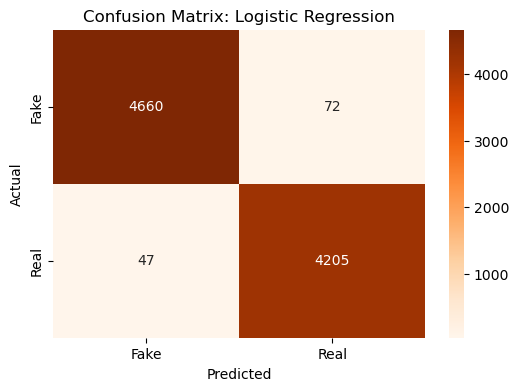

In [45]:
from sklearn.linear_model import LogisticRegression

# 1. Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Display Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")

# 3. Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9879786286731967
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4654
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8984
   macro avg       0.99      0.99      0.99      8984
weighted avg       0.99      0.99      0.99      8984



Naive Bayes Accuracy: 93.41%


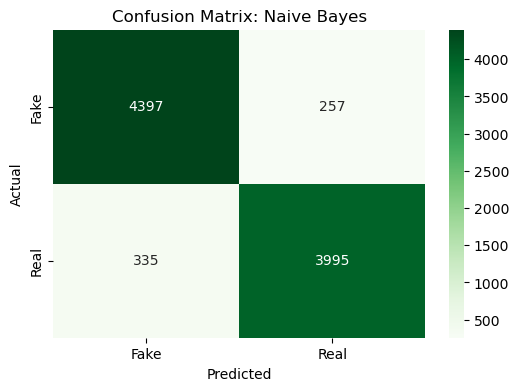

In [71]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 2. Display Accuracy
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%")

# 3. Plot Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train model
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Detailed report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)


Naive Bayes Accuracy: 0.9341050756901158
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4654
           1       0.94      0.92      0.93      4330

    accuracy                           0.93      8984
   macro avg       0.93      0.93      0.93      8984
weighted avg       0.93      0.93      0.93      8984

Naive Bayes Confusion Matrix:
[[4397  257]
 [ 335 3995]]


In [75]:
import pickle

# Use 'model' instead of 'logistic_regression_model'
pickle.dump(model, open('model_news.pkl', 'wb'))

# This one looks correct based on your previous screenshot
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl', 'wb'))

print("Files saved successfully!")

Files saved successfully!
